In [3]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import random
import os

from classifier import *

## Logistic Regression

The following document will explain the model used for logistic regression, how the code was implemented, and the results on all the given datasets.

By running "logisticregression.py" with the next argument as the desired dataset, this code can be run in the terminal for any specified dataset. The specific command would be:
python logisticregression.py 'classify\_d5\_k3\_saved2.mat'

The example dataset shown can be replaced with any of the given datasets.

### Description of the Model

Logisitic regression is a discriminative graphical model, meaning that it directly maximizes $p(y|x)$. Logisitic regression is a modification of linear regression, by subsitution the hypothesis function of a linear mapping, to the sigmoid function. The use of the sigmoid function for hypothesis results in outputting values between 0 and 1, which are then translated to either 0 or 1 based on a threshold (of 0.5) for the binary classification task. The hypothesis with the sigmoid function is:
$$p(y=1|x) = h_{\theta} = \frac{1}{1+\exp{(-\theta^Tx)}}$$
$$p(y=0|x) = 1- h_{\theta}$$
Note in our case $y=1$ corresponds to class 2, and $y=0$ corresponds to class 1.

To find the parameters $\theta$, the maximum likelihod estimation is used. Training a model to find the parameters  can be done by maximizing the conditional log likelihood of the training data.

The logistic regression cost function is:
$$Cost(h_{\theta}(x), y) = y*(-\log(h_{\theta}(x))) + (1-y)*(-\log(1-h_{\theta}(x)))$$

For a training set with $m$ points, the likelihood of the parameters is:
$$L(\theta)= p(Y|X; \theta)$$ 
Where, the $L$ represents the likelihood, the $Y$ and $X$ represent the class and data for all the points in the training set. Using the chain rules for probabilities and the previously given equation for $p(y^i|x^i;\theta)$, this equation can be written as:
$$L(\theta)= \prod_{i=1}^m (h_{\theta}(x^i)^{y^i})(1-h_{\theta}(x^i))^{1-y^i}$$ 

This can be transformed into the log likelihood:
$$l(\theta) = \log L(\theta)= \sum_{i=1}^m y^i \log (h_{\theta}(x^i)) + (1-y^i) \log(1-h_{\theta}(x^i))$$

The objective will be to maximize the log likelihood, and this can be done using gradient descent.

In order to optimize the parameters, this can be done iteratively using gradient descent, to update the parameters at each step up the gradient towards the maximum. The update equation is:

$$\theta := \theta + \alpha \nabla_{\theta} l(\theta)$$

By taking gradient of the log likelihood function, this equation can be simplified to:
$$\theta := \theta + \alpha (y^i-h_{\theta}(x^i))x_j^i$$

This is the equation that was implemented in the code for gradient descent.

### Training Algorithm

This section will show step by step the code that was used to execute the training of the model. This code was also consolidated into one function "logistic_regression" in the submitted python file. 

#### Loading Files

First the files are loaded from the matlab file an formatted into the format required for use in python. The output of the format data function will be the training features and the class IDs in a list. In this code, $0$ was used to represent class 1, and $1$ was used to represent class 2. The features list, is a list of the feature vectors. Note the format data function also adds an extra column as required to enable setting parameters for the intercept, so that the parameters found are not restricted to passing through the origin.

In [4]:
# load file
mat = scipy.io.loadmat('classify_d4_k3_saved1.mat')
features, classIDs = format_data(mat)

#### Logistic Regression Parameters

To begin logisitic regression, first set the required parameters, of the learning rate and the max number of steps for gradient descent.

In [9]:
# logistic regression parameters

num_steps = 500000
learning_rate = 0.0001

#### Gradient Descent

Gradient descent for the parameters, $\theta$, optimization will be used to update the parameters with the following equation: 

$$\theta := \theta + \alpha (y^i - h_{\theta}(x^i))x_j^i$$

Where $\alpha$ is the learning rate set in the previous section, the $x$ are the points in the training set, the $y$ is the class, and $h$ is the prediction of the class. The predictions $h$ are calculated using the sigmoid function.

This equation will be executed in the following code. The loglikelihoods will be printed out as it proceeds to track the progress.

In [10]:
# initialize parameters:
params = np.ones(features.shape[1])

# gradient descent
for step in range(0, num_steps):
    scores = np.dot(features, params)
    predictions = sigmoid(scores)

    # Update weights with log likelihood gradient
    errors = classIDs - predictions
        
    gradient = np.dot(features.T, errors)
    params += learning_rate * gradient
    
    if np.linalg.norm(gradient) < 0.0001:
        print("Gradient is close to 0, reached convergence.")
        print("Final Loglikelihood:")
        print(log_likelihood(features, classIDs, params))
        break
    
    # Print log-likelihoods
    if step % 10000 == 0:
        print(log_likelihood(features, classIDs, params))
        
    
        

-1371.4056583
-815.68939063
-815.662721761
-815.662696567
Gradient is close to 0, reached convergence.
Final Loglikelihood:
-815.662696545


### Results

The following section will show step by step how the code generates the results from the parameters calculated for the model. The accuracy will be calculated and compared to the accruacy from a pre-built function in python sklearn.

#### Format Test Data 

First the data is formatted for the testing. This is done the same way as previously, however train is set to false, which means it will take data points not yet used in the training set. The train/test split is 80/20. The test data is taken as the last 20% of the data, and since this data was randomly generated, this method is acceptable (ie. it does not need to be shuffled before hand because it was already generated randomly).

In [11]:
test_features, test_classIDs = format_data(mat, train = False)

#### Results on Test Data

The results from one dataset is shown below. The final class predictions is obtained from the sigmoid. The cut-off threshold to associate class 0 or 1 with a given point is set at $0.5$, and this is accomplished by the round function. 

The data is also plotted to visualize the success of the classification. The left half of the graph should be class 0 and the right half of the graph should be class 1. The accuracy is calculated as the number of correctly classified points after the rounding.

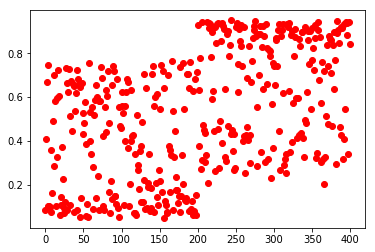

Accuracy:
0.64


In [12]:
test_scores = np.dot(test_features, params)
preds = sigmoid(test_scores)
acc = sum(np.round(preds) == test_classIDs) / len(preds)

plt.plot(preds, 'ro')
plt.show()

print("Accuracy:")
print(acc)

#### Comparison to Sklearn

We compared to the accuracy of sklearn to validate the success of our implementation of this algorithm. It is clear that the accuracies from our implementation is similar to the accuracy from sklearn.

In [13]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(features[:,1:], classIDs)

acc_sklearn = clf.score(test_features[:,1:], test_classIDs)

print('Accuracy from sk-learn: ')
print(acc_sklearn)

Accuracy from sk-learn: 
0.64


#### Results on All Datasets

The previous steps have been summarized into a training function and testing function. The training function called "logistic_regression", will load the data and run the gradient descent as previously shown, and the test function will repeat the steps shown in the testing section. This will facilitate running these operations on all the given datasets. 
In this section we will run these functions on all the data sets and print an output of the results for comparison.

In [14]:
results = []
print("Results:")
print("File | Accuracy | sklearn Accuracy")

for file in os.listdir("."):
    if file.endswith(".mat"):
        params = logistic_regression(data=file)
        acc = test(params=params, data = file)
        sk_acc = test_sklearn(data = file)
        print(str(file) + "| "+ str(acc) + "| "+ str(sk_acc))
        results.append([file, acc, sk_acc])

Results:
File | Accuracy | sklearn Accuracy
classify_d3_k2_saved1.mat| 0.655| 0.655
classify_d3_k2_saved2.mat| 0.64| 0.64
classify_d3_k2_saved3.mat| 0.6825| 0.6825
classify_d4_k3_saved1.mat| 0.7325| 0.7325
classify_d4_k3_saved2.mat| 0.7275| 0.7275
classify_d5_k3_saved1.mat| 0.7175| 0.7175
classify_d5_k3_saved2.mat| 0.7175| 0.72
classify_d99_k50_saved1.mat| 1.0| 1.0
classify_d99_k50_saved2.mat| 1.0| 1.0
classify_d99_k60_saved1.mat| 1.0| 1.0
classify_d99_k60_saved2.mat| 1.0| 1.0


It is clear this classifier work very well for the larger datasets. 